In [1]:
# pip install nba_api

In [2]:
from nba_api.stats.static import players
from nba_api.stats.static import teams

In [3]:
%matplotlib inline
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
# ignore_warnings = np.seterr(divide='ignore', invalid='ignore')

In [4]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)
    
    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)
    
    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    
    # outer Lines
    outer_lines1 = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill = False)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc,center_outer_arc,center_inner_arc,outer_lines1]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [5]:
# players.find_players_by_full_name('Michael')

In [6]:
# teams.find_teams_by_full_name('Bulls')

In [7]:
#all teams df
all_teams = teams.get_teams()
all_teams_df = pd.DataFrame(all_teams) 
all_teams_df.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [8]:
# #all players df
# all_players = players.get_players()
# all_players_df = pd.DataFrame(all_players) 
# all_players_df.head()

In [9]:
#If player name = "player", populate shot chart detail parameter "player_id" with 'id' from:
player = input("Enter an NBA players full name i.e 'Michael Jordan' or 'Stephen Curry':\nYou picked ")

def get_players(player_name):
    player_dic = players.find_players_by_full_name(player_name)
    return player_dic

def get_player_id(player_name):
    player_dic = get_players(player_name)
    player_id = player_dic[0]['id']
    player_id = str(player_id)
    return player_id

get_player_id(player)

Enter an NBA players full name i.e 'Michael Jordan' or 'Stephen Curry':
You picked Stephen curry


'201939'

In [10]:
get_players(player)

[{'id': 201939,
  'full_name': 'Stephen Curry',
  'first_name': 'Stephen',
  'last_name': 'Curry',
  'is_active': True}]

In [11]:
# from matplotlib.offsetbox import OffsetImage
# import urllib.request

# url = f"http://stats.nba.com/media/players/230x185/{int(get_player_id(player))}.png"
# url1 = f"{get_player_id(player)}.png"

# pic = urllib.request.urlretrieve((url),(url1))

# player_pic = plt.imread(pic[0])

# # ## plot the image
# # plt.imshow(player_pic)
# # plt.show()

In [12]:
#Create Shot Chart Dataframe
from nba_api.stats.endpoints import shotchartdetail

shot_df =  shotchartdetail.ShotChartDetail(
    team_id = 0,
    player_id = get_player_id(player),
    season_nullable = '',
#     date_from_nullable='1995-01-01',
#     date_to_nullable='2020-12-31',
    context_measure_simple='FGA'
)
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
shot_df = shot_df.get_data_frames()[0]
shot_df.index = shot_df.index + 1

In [13]:
from nba_api.stats.endpoints import playercareerstats

#Create original dataframe (all seasons)
player_career = playercareerstats.PlayerCareerStats(player_id = get_player_id(player))
player_career_stats_df = player_career.get_data_frames()[0]
player_career_stats_df.index = player_career_stats_df.index + 1
pd.set_option('max_columns', None)
player_career_stats_df.head()

#Parse and filter original dataframe as desired
season_averages_necessary_info = player_career_stats_df.loc[:,('PLAYER_ID','SEASON_ID','TEAM_ID','GP')]
season_averages_percents = player_career_stats_df.loc[:,('FG_PCT','FG3_PCT','FT_PCT')]
season_averages_percents = season_averages_percents * 100
season_averages_from_totals = round(player_career_stats_df.loc[:,('PTS','REB','AST','STL','BLK', 'TOV', 'PF','FGM','FGA','FG3M','FG3A','FTM','FTA')].div(player_career_stats_df['GP'],axis=0),1)

#Create new dataframe
all_season_averages_df = pd.concat([season_averages_necessary_info, season_averages_from_totals,season_averages_percents], axis=1, join='inner')
career_averages_df = round(all_season_averages_df.loc[:,('GP','PTS','REB','AST','STL','BLK', 'TOV', 'PF','FGM','FGA','FG3M','FG3A','FTM','FTA','FG_PCT','FG3_PCT','FT_PCT')].mean(),2)
career_averages_df = pd.DataFrame(career_averages_df).transpose()

career_averages_df

all_season_averages_df

,PLAYER_ID,SEASON_ID,TEAM_ID,GP,PTS,REB,AST,STL,BLK,TOV,PF,FGM,FGA,FG3M,FG3A,FTM,FTA,FG_PCT,FG3_PCT,FT_PCT
1,201939,2009-10,1610612744,80,17.5,4.4,5.9,1.9,0.2,3.0,3.2,6.6,14.3,2.1,4.8,2.2,2.5,46.2,43.7,88.5
2,201939,2010-11,1610612744,74,18.6,3.9,5.8,1.5,0.3,3.1,3.1,6.8,14.2,2.0,4.6,2.9,3.1,48.0,44.2,93.4
3,201939,2011-12,1610612744,26,14.7,3.4,5.3,1.5,0.3,2.5,2.4,5.6,11.4,2.1,4.7,1.5,1.8,49.0,45.5,80.9
4,201939,2012-13,1610612744,78,22.9,4.0,6.9,1.6,0.2,3.1,2.5,8.0,17.8,3.5,7.7,3.4,3.7,45.1,45.3,90.0
5,201939,2013-14,1610612744,78,24.0,4.3,8.5,1.6,0.2,3.8,2.5,8.4,17.7,3.3,7.9,3.9,4.5,47.1,42.4,88.5
6,201939,2014-15,1610612744,80,23.8,4.3,7.7,2.0,0.2,3.1,2.0,8.2,16.8,3.6,8.1,3.8,4.2,48.7,44.3,91.4
7,201939,2015-16,1610612744,79,30.1,5.4,6.7,2.1,0.2,3.3,2.0,10.2,20.2,5.1,11.2,4.6,5.1,50.4,45.4,90.8
8,201939,2016-17,1610612744,79,25.3,4.5,6.6,1.8,0.2,3.0,2.3,8.5,18.3,4.1,10.0,4.1,4.6,46.8,41.1,89.8
9,201939,2017-18,1610612744,51,26.4,5.1,6.1,1.6,0.2,3.0,2.2,8.4,16.9,4.2,9.8,5.5,5.9,49.5,42.3,92.1
10,201939,2018-19,1610612744,69,27.3,5.3,5.2,1.3,0.4,2.8,2.4,9.2,19.4,5.1,11.7,3.8,4.2,47.2,43.7,91.6


In [14]:
# pip install nba_api
from nba_api.stats.static import players
import pandas as pd

In [15]:
#Get advanced stat data from basketball reference 

#pip install basketball_reference_web_scraper

from basketball_reference_web_scraper import client

# Get advanced season statistics for all players based on the user selected year
year_ex = 1998

def players_advanced_season(year, player_name):
    '''This function scrapes all players advanced stats from basketball reference.
       It returns all players in the leagues from a specific year. '''
    br_data = client.players_advanced_season_totals(season_end_year=year)

    br_data = pd.DataFrame(br_data)

    #get a specific player from the webscraped bleacher report data
    player_name = pd.DataFrame(get_players(player_name))
    player_name.rename(columns={'full_name':'name'}, inplace=True)

    merge_df = pd.merge(br_data, player_name, on="name")
    merge_df["true_shooting_percentage"] = merge_df["true_shooting_percentage"] * 100
    merge_df['year'] = year

    advanced_stat_df = merge_df[['year','id','name','slug','player_efficiency_rating','true_shooting_percentage','win_shares','box_plus_minus','value_over_replacement_player']]
    
    return advanced_stat_df

# players_advanced_season(2010, 'James Harden')



In [16]:
# br_data1 = client.players_advanced_season_totals(season_end_year=2020)

# br_data1 = pd.DataFrame(br_data1)

# br_data1

In [17]:
def year_plus_one(x=2020,player='Michael Jordan'):
    for idx , year in enumerate(range(1996,x+1)):
        if idx == 0:
            br_data = players_advanced_season(year,player)
        else:
            temp_data = players_advanced_season(year,player)
            br_data = br_data.append(temp_data)           
    return br_data


In [18]:
advanced_stat_df = year_plus_one(player=player, x= 2020)
advanced_stat_df

,year,id,name,slug,player_efficiency_rating,true_shooting_percentage,win_shares,box_plus_minus,value_over_replacement_player
0,2010,201939,Stephen Curry,curryst01,16.3,56.8,4.7,0.7,2.0
0,2011,201939,Stephen Curry,curryst01,19.4,59.5,6.6,2.3,2.7
0,2012,201939,Stephen Curry,curryst01,21.2,60.5,2.2,4.3,1.2
0,2013,201939,Stephen Curry,curryst01,21.3,58.9,11.2,5.4,5.6
0,2014,201939,Stephen Curry,curryst01,24.1,61.0,13.4,7.4,6.7
0,2015,201939,Stephen Curry,curryst01,28.0,63.8,15.7,9.9,7.9
0,2016,201939,Stephen Curry,curryst01,31.5,66.9,17.9,11.9,9.5
0,2017,201939,Stephen Curry,curryst01,24.6,62.4,12.6,6.9,5.9
0,2018,201939,Stephen Curry,curryst01,28.2,67.5,9.1,7.7,4.0
0,2019,201939,Stephen Curry,curryst01,24.4,64.1,9.7,6.6,5.1


In [19]:
advanced_stat_df.reset_index()

,index,year,id,name,slug,player_efficiency_rating,true_shooting_percentage,win_shares,box_plus_minus,value_over_replacement_player
0,0,2010,201939,Stephen Curry,curryst01,16.3,56.8,4.7,0.7,2.0
1,0,2011,201939,Stephen Curry,curryst01,19.4,59.5,6.6,2.3,2.7
2,0,2012,201939,Stephen Curry,curryst01,21.2,60.5,2.2,4.3,1.2
3,0,2013,201939,Stephen Curry,curryst01,21.3,58.9,11.2,5.4,5.6
4,0,2014,201939,Stephen Curry,curryst01,24.1,61.0,13.4,7.4,6.7
5,0,2015,201939,Stephen Curry,curryst01,28.0,63.8,15.7,9.9,7.9
6,0,2016,201939,Stephen Curry,curryst01,31.5,66.9,17.9,11.9,9.5
7,0,2017,201939,Stephen Curry,curryst01,24.6,62.4,12.6,6.9,5.9
8,0,2018,201939,Stephen Curry,curryst01,28.2,67.5,9.1,7.7,4.0
9,0,2019,201939,Stephen Curry,curryst01,24.4,64.1,9.7,6.6,5.1


In [20]:
#Get individual values from advanced_stat_df to put on graph
per = round(float(advanced_stat_df.player_efficiency_rating.mean()),2)
ts_pct = round(float(advanced_stat_df.true_shooting_percentage.mean()),2)
win_shares = round(float(advanced_stat_df.win_shares.mean()),2)
box_plus_minus = round(float(advanced_stat_df.box_plus_minus.mean()),2)
vor = round(float(advanced_stat_df.value_over_replacement_player.mean()),2)

advanced_stats = (f'''
Per: {per}
TS%: {round(ts_pct,1)}%
Win-Shares: {win_shares}
Box +/-: {box_plus_minus}
Vor: {vor}

''')

In [21]:
list(enumerate(range(1995,1999+1)))

[(0, 1995), (1, 1996), (2, 1997), (3, 1998), (4, 1999)]

In [22]:
#Create Database
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")

mydb = myclient["Basketball_Reference_Advanced_Stats_db"]

In [23]:
print(myclient.list_database_names())

['Basketball_Reference_Advanced_Stats_db', 'admin', 'classDB', 'config', 'craigslist_db', 'local']


In [24]:
br_data = client.players_advanced_season_totals(season_end_year=2020)

br_data = pd.DataFrame(br_data)

pd.DataFrame(br_data)

,slug,name,positions,age,team,games_played,minutes_played,player_efficiency_rating,true_shooting_percentage,three_point_attempt_rate,free_throw_attempt_rate,offensive_rebound_percentage,defensive_rebound_percentage,total_rebound_percentage,assist_percentage,steal_percentage,block_percentage,turnover_percentage,usage_percentage,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player,is_combined_totals
0,adamsst01,Steven Adams,[Position.CENTER],26,Team.OKLAHOMA_CITY_THUNDER,61,1654,20.6,0.607,0.006,0.424,14.0,23.8,19.1,13.4,1.5,3.5,14.3,17.3,3.8,2.6,6.4,0.187,2.0,1.1,3.0,2.1,False
1,adebaba01,Bam Adebayo,[Position.POWER_FORWARD],22,Team.MIAMI_HEAT,71,2401,20.4,0.598,0.018,0.487,8.6,25.0,17.1,24.0,1.7,3.8,17.6,21.2,4.6,3.9,8.5,0.169,1.4,2.0,3.4,3.3,False
2,aldrila01,LaMarcus Aldridge,[Position.CENTER],34,Team.SAN_ANTONIO_SPURS,53,1754,19.7,0.571,0.198,0.241,6.3,17.8,12.0,11.4,1.0,4.4,7.8,23.4,3.0,1.4,4.5,0.123,1.8,-0.5,1.3,1.5,False
3,alexaky01,Kyle Alexander,[Position.POWER_FORWARD],23,Team.MIAMI_HEAT,1,1,0.0,0.000,0.000,0.000,100.0,0.0,56.1,0.0,0.0,0.0,0.0,44.1,0.0,0.0,0.0,-0.491,-2.8,-11.4,-14.2,0.0,False
4,alexani01,Nickeil Alexander-Walker,[Position.SHOOTING_GUARD],21,Team.NEW_ORLEANS_PELICANS,46,555,8.0,0.454,0.512,0.129,1.5,14.3,7.9,20.5,1.3,1.2,15.5,22.8,-0.8,0.4,-0.3,-0.030,-3.4,-1.0,-4.4,-0.3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,youngtr01,Trae Young,[Position.POINT_GUARD],21,Team.ATLANTA_HAWKS,60,2120,23.9,0.595,0.455,0.448,1.6,11.5,6.5,45.6,1.4,0.3,16.2,34.9,5.3,0.6,5.9,0.133,6.3,-2.3,4.0,3.2,False
586,zelleco01,Cody Zeller,[Position.CENTER],27,Team.CHARLOTTE_HORNETS,58,1341,18.8,0.576,0.157,0.374,12.6,21.2,16.7,11.3,1.5,1.7,11.9,20.8,2.3,1.3,3.6,0.129,0.2,-0.8,-0.6,0.5,False
587,zellety01,Tyler Zeller,[Position.CENTER],30,Team.SAN_ANTONIO_SPURS,2,4,22.4,0.250,0.000,0.000,80.8,27.0,53.9,0.0,0.0,0.0,0.0,43.2,0.0,0.0,0.0,-0.075,-0.5,-22.3,-22.8,0.0,False
588,zizican01,Ante Žižić,[Position.CENTER],23,Team.CLEVELAND_CAVALIERS,22,221,16.4,0.597,0.000,0.264,9.0,24.4,16.6,4.2,1.5,1.9,11.1,17.5,0.3,0.2,0.5,0.106,-1.7,-1.5,-3.2,-0.1,False


In [25]:
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]

mycol = mydb["Basketball_Reference_Advanced_Stats_db"]

In [26]:
# #Putting this into MongoDb
# myclient = pymongo.MongoClient("mongodb://localhost:27017/")
# mydb = myclient["Basketball_Reference_Advanced_Stats_db"]
# mycol = mydb["Players"]

# mydict = { "name": "John", "address": "Highway 37" }

# x = mycol.insert_one(mydict)

In [27]:
#Dateframes for totals 
total_shots_taken = shot_df.shape[0]
made_shot_df = shot_df[shot_df['SHOT_MADE_FLAG']==1]
total_shots_made = made_shot_df.EVENT_TYPE.count()

total_shots_percent = '{percent:.1%}'.format(percent = (total_shots_made/total_shots_taken))

In [28]:
#Get individual values to be placed on graph

career_averages_df_bold = 'Career Averages'

pts = (f'''Points: {round(float(career_averages_df['PTS']),1)}''')
reb = (f'''Rebounds: {round(float(career_averages_df['REB']),1)}''')
ast = (f'''Assists: {round(float(career_averages_df['AST']),1)}''')
stl = (f'''Steals: {round(float(career_averages_df['STL']),1)}''')
blk = (f'''Blocks: {round(float(career_averages_df['BLK']),1)}''')
tov = (f'''Turnovers: {round(float(career_averages_df['TOV']),1)}''')
pf = (f'''Fouls: {round(float(career_averages_df['PF']),1)}''')
fgm_fga_pg = (f'''Fg's: {round(float(career_averages_df['FGM']),1)}/{round(float(career_averages_df['FGA']),1)}''')
fg_pct = (f'''Fg%: {round(float(career_averages_df['FG_PCT']),1)}%''')
fg3m_fg3a_pg = (f'''3pt's: {round(float(career_averages_df['FG3M']),1)}/{round(float(career_averages_df['FG3A']),1)}''')
fg3_pct = (f'''3pt%: {round(float(career_averages_df['FG3_PCT']),1)}%''')
ft_pct = (f'''Ft%: {round(float(career_averages_df['FT_PCT']),1)}%''')
ftm_fta_pg = (f'''Ft's: {round(float(career_averages_df['FTM']),1)}/{round(float(career_averages_df['FTA']),1)}''')

t_shots = (f'''{total_shots_made}/{total_shots_taken}''')


career_averages = (f'''
{pts}
{reb}
{ast}
{stl}
{blk}
{tov}
{pf}

{fgm_fga_pg}
{fg3m_fg3a_pg}
{ftm_fta_pg}

{fg_pct}
{fg3_pct}
{ft_pct}

      ''')


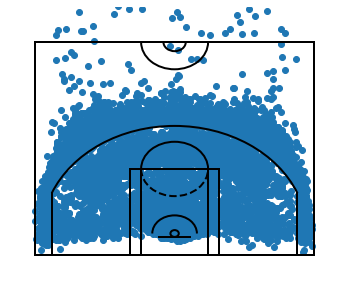

In [29]:
#All shots
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(6,5))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.axis('off')
plt.scatter(shot_df.LOC_X, shot_df.LOC_Y)
plt.show()

In [30]:
shot_df.SHOT_ZONE_BASIC.unique()

array(['Above the Break 3', 'Mid-Range', 'In The Paint (Non-RA)',
       'Restricted Area', 'Left Corner 3', 'Right Corner 3', 'Backcourt'],
      dtype=object)

In [31]:
# shot_df.SHOT_ZONE_AREA.unique()

In [32]:
# shot_df.SHOT_TYPE.unique()

In [33]:
##Percentage Data Frames Option 1

# mid_range_totals
mid_range_totals = shot_df[shot_df.SHOT_ZONE_BASIC == 'Mid-Range']
mid_range_totals.name = "mid-range"
# center_3_totals
center_3_totals = shot_df[shot_df.SHOT_ZONE_BASIC == 'Above the Break 3']
center_3_totals.name = "center 3"
# ra_totals
ra_totals = shot_df[shot_df.SHOT_ZONE_BASIC == 'Restricted Area']
ra_totals.name = 'restricted area'

# l_corner_3_totals
l_corner_3_totals = shot_df[shot_df.SHOT_ZONE_BASIC == 'Left Corner 3']
l_corner_3_totals.name = 'left corner 3'

# paint_totals
paint_totals = shot_df[shot_df.SHOT_ZONE_BASIC == 'In The Paint (Non-RA)']
paint_totals.name = 'in the paint'

# r_corner_3_totals
r_corner_3_totals = shot_df[shot_df.SHOT_ZONE_BASIC == 'Right Corner 3']
r_corner_3_totals.name = 'right corner 3'

# backcourt_totals
backcourt_totals = shot_df[shot_df.SHOT_ZONE_BASIC == 'Backcourt']
backcourt_totals.name = 'backcourt'

In [34]:
total_shots_taken

11928

In [35]:
# def shot_zone_basic():
#     ## Mid-range

#     # Attempted = 0 and made = 0 
#     if mid_range_totals.empty == True:
#             d = ({'EVENT_TYPE': [0, 0]})
#             df_alternative1 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])

#             mid_range_missed = df_alternative1['EVENT_TYPE'][0]
#             mid_range_made = df_alternative1['EVENT_TYPE'][1]
#             mid_range_taken = mid_range_made + mid_range_missed
#             mid_range_percent = '0.0%'   
#             mid_range_summary = (f'''He shot {mid_range_made}/{mid_range_taken} from the {mid_range_totals.name}, making {mid_range_percent} of them.
#     This means he took {round((mid_range_made/total_shots_taken)*100,1)}% of his total shots from the {mid_range_totals.name}.''')
#             mid_range_summary_plot = (f'''--Mid-range--
#     FGM/FGA:          {mid_range_made}/{mid_range_taken}
#     % From Spot:      {mid_range_percent}
#     % of Total Shots: {round((mid_range_taken/total_shots_taken)*100,1)}%''')

#     # Attemped > 0 and made = 0   
#     elif 'Made Shot' not in mid_range_totals['EVENT_TYPE'].unique():
#             mid_range_shots = mid_range_totals.loc[:,'EVENT_TYPE'].value_counts()
#             mid_range_taken = mid_range_shots['Missed Shot']
#             mid_range_percent = '{percent:.1%}'.format(percent = (0/mid_range_taken))
#             mid_range_summary = (f'''He shot {0}/{mid_range_taken} from the {mid_range_totals.name}, making {mid_range_percent} of them.
#     This means he took {round((0/total_shots_taken)*100,1)}% of his total shots from the {mid_range_totals.name}.''')
#             mid_range_summary_plot = (f'''--Mid-range--        
#     FGM/FGA:          {0}/{mid_range_taken}
#     % From Spot:      {mid_range_percent}
#     % of Total Shots: {round((0/total_shots_taken)*100,1)}%''')

#             d = ({'EVENT_TYPE': [0, mid_range_taken]})
#             df_alternative1 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])

#     # Attempted > 0 and made > 0        
#     else:
#             mid_range_shots = mid_range_totals.loc[:,'EVENT_TYPE'].value_counts()
#             mid_range_made = mid_range_shots['Made Shot']
#             mid_range_taken = mid_range_shots['Missed Shot'] + mid_range_shots['Made Shot']
#             mid_range_percent = '{percent:.1%}'.format(percent = (mid_range_made/mid_range_taken)) 
#             mid_range_summary = (f'''He shot {mid_range_made}/{mid_range_taken} from the {mid_range_totals.name}, making {mid_range_percent} of them.
#     This means he took {round((mid_range_made/total_shots_taken)*100,1)}% of his total shots from the {mid_range_totals.name}.''')
#             mid_range_summary_plot = (f'''--Mid-range--
#     FGM/FGA:          {mid_range_made}/{mid_range_taken} 
#     % From Spot:      {mid_range_percent}
#     % of Total Shots: {round((mid_range_taken/total_shots_taken)*100,1)}%''')

#             df_alternative1 = mid_range_shots.to_frame()

#     # df_alternative1

#     ## Center 3

#     # Attempted = 0 and made = 0 
#     if center_3_totals.empty == True:
#             d = ({'EVENT_TYPE': [0, 0]})
#             df_alternative2 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])

#             center_3_missed = df_alternative2['EVENT_TYPE'][0]
#             center_3_made = df_alternative2['EVENT_TYPE'][1]
#             center_3_taken = center_3_made + center_3_missed
#             center_3_percent = '0.0%'   
#             center_3_summary = (f'''He shot {center_3_made}/{center_3_taken} from the {center_3_totals.name}, making {center_3_percent} of them.
#     This means he took {round((center_3_made/total_shots_taken)*100,1)}% of his total shots from the {center_3_totals.name}.''')
#             center_3_summary_plot = (f'''--Center 3--
#     FGM/FGA:          {center_3_made}/{center_3_taken}
#     % From Spot:      {center_3_percent}
#     % of Total Shots: {round((center_3_taken/total_shots_taken)*100,1)}%''')

#     # Attemped > 0 and made = 0   
#     elif 'Made Shot' not in center_3_totals['EVENT_TYPE'].unique():
#             center_3_shots = center_3_totals.loc[:,'EVENT_TYPE'].value_counts()
#             center_3_taken = center_3_shots['Missed Shot']
#             center_3_percent = '{percent:.1%}'.format(percent = (0/center_3_taken))
#             center_3_summary = (f'''He shot {0}/{center_3_taken} from the {center_3_totals.name}, making {center_3_percent} of them.
#     This means he took {round((0/total_shots_taken)*100,1)}% of his total shots from the {center_3_totals.name}.''')
#             center_3_summary_plot = (f'''--Center 3--     
#     FGM/FGA:          {0}/{center_3_taken}
#     % From Spot:      {center_3_percent}
#     % of Total Shots: {round((0/total_shots_taken)*100,1)}%''')

#             d = ({'EVENT_TYPE': [0, center_3_taken]})
#             df_alternative2 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])

#     # Attempted > 0 and made > 0        
#     else:
#             center_3_shots = center_3_totals.loc[:,'EVENT_TYPE'].value_counts()
#             center_3_made = center_3_shots['Made Shot']
#             center_3_taken = center_3_shots['Missed Shot'] + center_3_shots['Made Shot']
#             center_3_percent = '{percent:.1%}'.format(percent = (center_3_made/center_3_taken)) 
#             center_3_summary = (f'''He shot {center_3_made}/{center_3_taken} from the {center_3_totals.name}, making {center_3_percent} of them.
#     This means he took {round((center_3_made/total_shots_taken)*100,1)}% of his total shots from the {center_3_totals.name}.''')
#             center_3_summary_plot = (f'''--Center 3--
#     FGM/FGA:          {center_3_made}/{center_3_taken} 
#     % From Spot:      {center_3_percent}
#     % of Total Shots: {round((center_3_taken/total_shots_taken)*100,1)}%''')

#             df_alternative2 = center_3_shots.to_frame()

#     # df_alternative2

#     ## Restricted Area

#     # Attempted = 0 and made = 0 
#     if ra_totals.empty == True:
#             d = ({'EVENT_TYPE': [0, 0]})
#             df_alternative3 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])

#             ra_missed = df_alternative3['EVENT_TYPE'][0]
#             ra_made = df_alternative3['EVENT_TYPE'][1]
#             ra_taken = ra_made + ra_missed
#             ra_percent = '0.0%'   
#             ra_summary = (f'''He shot {ra_made}/{ra_taken} from the {ra_totals.name}, making {ra_percent} of them.
#     This means he took {round((ra_made/total_shots_taken)*100,1)}% of his total shots from the {ra_totals.name}.''')
#             ra_summary_plot = (f'''--Restricted Area--
#     FGM/FGA:          {ra_made}/{ra_taken}
#     % From Spot:      {ra_percent}
#     % of Total Shots: {round((ra_taken/total_shots_taken)*100,1)}%''')

#     # Attemped > 0 and made = 0   
#     elif 'Made Shot' not in ra_totals['EVENT_TYPE'].unique():
#             ra_shots = ra_totals.loc[:,'EVENT_TYPE'].value_counts()
#             ra_taken = ra_shots['Missed Shot']
#             ra_percent = '{percent:.1%}'.format(percent = (0/ra_taken))
#             ra_summary = (f'''He shot {0}/{ra_taken} from the {ra_totals.name}, making {ra_percent} of them.
#     This means he took {round((0/total_shots_taken)*100,1)}% of his total shots from the {ra_totals.name}.''')
#             ra_summary_plot = (f'''--Restricted Area--        
#     FGM/FGA:          {0}/{ra_taken}
#     % From Spot:      {ra_percent}
#     % of Total Shots: {round((0/total_shots_taken)*100,1)}%''')

#             d = ({'EVENT_TYPE': [0, ra_taken]})
#             df_alternative3 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])

#     # Attempted > 0 and made > 0        
#     else:
#             ra_shots = ra_totals.loc[:,'EVENT_TYPE'].value_counts()
#             ra_made = ra_shots['Made Shot']
#             ra_taken = ra_shots['Missed Shot'] + ra_shots['Made Shot']
#             ra_percent = '{percent:.1%}'.format(percent = (ra_made/ra_taken)) 
#             ra_summary = (f'''He shot {ra_made}/{ra_taken} from the {ra_totals.name}, making {ra_percent} of them.
#     This means he took {round((ra_made/total_shots_taken)*100,1)}% of his total shots from the {ra_totals.name}.''')
#             ra_summary_plot = (f'''--Restricted Area--
#     FGM/FGA:          {ra_made}/{ra_taken} 
#     % From Spot:      {ra_percent}
#     % of Total Shots: {round((ra_taken/total_shots_taken)*100,1)}%''')

#             df_alternative3 = ra_shots.to_frame()

#     # df_alternative3

#     ## Left Corner 3

#     # Attempted = 0 and made = 0 
#     if l_corner_3_totals.empty == True:
#             d = ({'EVENT_TYPE': [0, 0]})
#             df_alternative4 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])

#             l_corner_3_missed = df_alternative4['EVENT_TYPE'][0]
#             l_corner_3_made = df_alternative4['EVENT_TYPE'][1]
#             l_corner_3_taken = l_corner_3_made + l_corner_3_missed
#             l_corner_3_percent = '0.0%'   
#             l_corner_3_summary = (f'''He shot {l_corner_3_made}/{l_corner_3_taken} from the {l_corner_3_totals.name}, making {l_corner_3_percent} of them.
#     This means he took {round((l_corner_3_made/total_shots_taken)*100,1)}% of his total shots from the {l_corner_3_totals.name}.''')
#             l_corner_3_summary_plot = (f'''--Left Corner 3--
#     FGM/FGA:          {l_corner_3_made}/{l_corner_3_taken}
#     % From Spot:      {l_corner_3_percent}
#     % of Total Shots: {round((l_corner_3_taken/total_shots_taken)*100,1)}%''')

#     # Attemped > 0 and made = 0   
#     elif 'Made Shot' not in l_corner_3_totals['EVENT_TYPE'].unique():
#             l_corner_3_shots = l_corner_3_totals.loc[:,'EVENT_TYPE'].value_counts()
#             l_corner_3_taken = l_corner_3_shots['Missed Shot']
#             l_corner_3_percent = '{percent:.1%}'.format(percent = (0/l_corner_3_taken))
#             l_corner_3_summary = (f'''He shot {0}/{l_corner_3_taken} from the {l_corner_3_totals.name}, making {l_corner_3_percent} of them.
#     This means he took {round((0/total_shots_taken)*100,1)}% of his total shots from the {l_corner_3_totals.name}.''')
#             l_corner_3_summary_plot = (f'''--Left Corner 3--      
#     FGM/FGA:          {0}/{l_corner_3_taken}
#     % From Spot:      {l_corner_3_percent}
#     % of Total Shots: {round((0/total_shots_taken)*100,1)}%''')

#             d = ({'EVENT_TYPE': [0, l_corner_3_taken]})
#             df_alternative4 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])

#     # Attempted > 0 and made > 0        
#     else:
#             l_corner_3_shots = l_corner_3_totals.loc[:,'EVENT_TYPE'].value_counts()
#             l_corner_3_made = l_corner_3_shots['Made Shot']
#             l_corner_3_taken = l_corner_3_shots['Missed Shot'] + l_corner_3_shots['Made Shot']
#             l_corner_3_percent = '{percent:.1%}'.format(percent = (l_corner_3_made/l_corner_3_taken)) 
#             l_corner_3_summary = (f'''He shot {l_corner_3_made}/{l_corner_3_taken} from the {l_corner_3_totals.name}, making {l_corner_3_percent} of them.
#     This means he took {round((l_corner_3_made/total_shots_taken)*100,1)}% of his total shots from the {l_corner_3_totals.name}.''')
#             l_corner_3_summary_plot = (f'''--Left Corner 3--
#     FGM/FGA:          {l_corner_3_made}/{l_corner_3_taken} 
#     % From Spot:      {l_corner_3_percent}
#     % of Total Shots: {round((l_corner_3_taken/total_shots_taken)*100,1)}%''')

#             df_alternative4 = l_corner_3_shots.to_frame()

#     # df_alternative4

#     ## Paint

#     # Attempted = 0 and made = 0 
#     if paint_totals.empty == True:
#             d = ({'EVENT_TYPE': [0, 0]})
#             df_alternative5 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])

#             paint_missed = df_alternative5['EVENT_TYPE'][0]
#             paint_made = df_alternative5['EVENT_TYPE'][1]
#             paint_taken = paint_made + paint_missed
#             paint_percent = '0.0%'   
#             paint_summary = (f'''He shot {paint_made}/{paint_taken} from the {paint_totals.name}, making {paint_percent} of them.
#     This means he took {round((paint_made/total_shots_taken)*100,1)}% of his total shots from the {paint_totals.name}.''')
#             paint_summary_plot = (f'''--In the Paint--
#     FGM/FGA:          {paint_made}/{paint_taken}
#     % From Spot:      {paint_percent}
#     % of Total Shots: {round((paint_taken/total_shots_taken)*100,1)}%''')

#     # Attemped > 0 and made = 0   
#     elif 'Made Shot' not in paint_totals['EVENT_TYPE'].unique():
#             paint_shots = paint_totals.loc[:,'EVENT_TYPE'].value_counts()
#             paint_taken = paint_shots['Missed Shot']
#             paint_percent = '{percent:.1%}'.format(percent = (0/paint_taken))
#             paint_summary = (f'''He shot {0}/{paint_taken} from the {paint_totals.name}, making {paint_percent} of them.
#     This means he took {round((0/total_shots_taken)*100,1)}% of his total shots from the {paint_totals.name}.''')
#             paint_summary_plot = (f'''--In the Paint--        
#     FGM/FGA:          {0}/{paint_taken}
#     % From Spot:      {paint_percent}
#     % of Total Shots: {round((0/total_shots_taken)*100,1)}%''')

#             d = ({'EVENT_TYPE': [0, paint_taken]})
#             df_alternative5 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])

#     # Attempted > 0 and made > 0        
#     else:
#             paint_shots = paint_totals.loc[:,'EVENT_TYPE'].value_counts()
#             paint_made = paint_shots['Made Shot']
#             paint_taken = paint_shots['Missed Shot'] + paint_shots['Made Shot']
#             paint_percent = '{percent:.1%}'.format(percent = (paint_made/paint_taken)) 
#             paint_summary = (f'''He shot {paint_made}/{paint_taken} from the {paint_totals.name}, making {paint_percent} of them.
#     This means he took {round((paint_made/total_shots_taken)*100,1)}% of his total shots from the {paint_totals.name}.''')
#             paint_summary_plot = (f'''--In the Paint--
#     FGM/FGA:          {paint_made}/{paint_taken} 
#     % From Spot:      {paint_percent}
#     % of Total Shots: {round((paint_taken/total_shots_taken)*100,1)}%''')

#             df_alternative5 = paint_shots.to_frame()

#     # df_alternative5

#     ## Right Corner 3

#     # Attempted = 0 and made = 0 
#     if r_corner_3_totals.empty == True:
#             d = ({'EVENT_TYPE': [0, 0]})
#             df_alternative6 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])

#             r_corner_3_missed = df_alternative6['EVENT_TYPE'][0]
#             r_corner_3_made = df_alternative6['EVENT_TYPE'][1]
#             r_corner_3_taken = r_corner_3_made + r_corner_3_missed
#             r_corner_3_percent = '0.0%'   
#             r_corner_3_summary = (f'''He shot {r_corner_3_made}/{r_corner_3_taken} from the {r_corner_3_totals.name}, making {r_corner_3_percent} of them.
#     This means he took {round((r_corner_3_made/total_shots_taken)*100,1)}% of his total shots from the {r_corner_3_totals.name}.''')
#             r_corner_3_summary_plot = (f'''--Right Corner 3--
#     FGM/FGA:          {r_corner_3_made}/{r_corner_3_taken}
#     % From Spot:      {r_corner_3_percent}
#     % of Total Shots: {round((r_corner_3_taken/total_shots_taken)*100,1)}%''')
#     # Attemped > 0 and made = 0   
#     elif 'Made Shot' not in r_corner_3_totals['EVENT_TYPE'].unique():
#             r_corner_3_shots = r_corner_3_totals.loc[:,'EVENT_TYPE'].value_counts()
#             r_corner_3_taken = r_corner_3_shots['Missed Shot']
#             r_corner_3_percent = '{percent:.1%}'.format(percent = (0/r_corner_3_taken))
#             r_corner_3_summary = (f'''He shot {0}/{r_corner_3_taken} from the {r_corner_3_totals.name}, making {r_corner_3_percent} of them.
#     This means he took {round((0/total_shots_taken)*100,1)}% of his total shots from the {r_corner_3_totals.name}.''')
#             r_corner_3_summary_plot = (f'''--Right Corner 3--    
#     FGM/FGA:          {0}/{r_corner_3_taken}
#     % From Spot:      {r_corner_3_percent}
#     % of Total Shots: {round((0/total_shots_taken)*100,1)}%''')

#             d = ({'EVENT_TYPE': [0, r_corner_3_taken]})
#             df_alternative6 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])

#     # Attempted > 0 and made > 0        
#     else:
#             r_corner_3_shots = r_corner_3_totals.loc[:,'EVENT_TYPE'].value_counts()
#             r_corner_3_made = r_corner_3_shots['Made Shot']
#             r_corner_3_taken = r_corner_3_shots['Missed Shot'] + r_corner_3_shots['Made Shot']
#             r_corner_3_percent = '{percent:.1%}'.format(percent = (r_corner_3_made/r_corner_3_taken)) 
#             r_corner_3_summary = (f'''He shot {r_corner_3_made}/{r_corner_3_taken} from the {r_corner_3_totals.name}, making {r_corner_3_percent} of them.
#     This means he took {round((r_corner_3_made/total_shots_taken)*100,1)}% of his total shots from the {r_corner_3_totals.name}.''')
#             r_corner_3_summary_plot = (f'''--Right Corner 3--
#     FGM/FGA:          {r_corner_3_made}/{r_corner_3_taken} 
#     % From Spot:      {r_corner_3_percent}
#     % of Total Shots: {round((r_corner_3_taken/total_shots_taken)*100,1)}%''')

#             df_alternative6 = r_corner_3_shots.to_frame()

#     # df_alternative6

#     ## Backcourt

#     # Attempted = 0 and made = 0 
#     if backcourt_totals.empty == True:
#             d = ({'EVENT_TYPE': [0, 0]})
#             df_alternative7 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])

#             backcourt_missed = df_alternative7['EVENT_TYPE'][0]
#             backcourt_made = df_alternative7['EVENT_TYPE'][1]
#             backcourt_taken = backcourt_made + backcourt_missed
#             backcourt_percent = '0.0%'   
#             backcourt_summary = (f'''He shot {backcourt_made}/{backcourt_taken} from the {backcourt_totals.name}, making {backcourt_percent} of them.
#     This means he took {round((backcourt_made/total_shots_taken)*100,1)}% of his total shots from the {backcourt_totals.name}.''')
#             backcourt_summary_plot = (f'''Beyond Half
#     FGM/FGA:          {backcourt_made}/{backcourt_taken}
#     % From Spot:      {backcourt_percent}
#     % of Total Shots: {round((backcourt_taken/total_shots_taken)*100,1)}%''')

#     # Attemped > 0 and made = 0   
#     elif 'Made Shot' not in backcourt_totals['EVENT_TYPE'].unique():
#             backcourt_shots = backcourt_totals.loc[:,'EVENT_TYPE'].value_counts()
#             backcourt_taken = backcourt_shots['Missed Shot']
#             backcourt_percent = '{percent:.1%}'.format(percent = (0/backcourt_taken))
#             backcourt_summary = (f'''He shot {0}/{backcourt_taken} from the {backcourt_totals.name}, making {backcourt_percent} of them.
#     This means he took {round((0/total_shots_taken)*100,1)}% of his total shots from the {backcourt_totals.name}.''')
#             backcourt_summary_plot = (f'''--Beyond Half--       
#     FGM/FGA:          {0}/{backcourt_taken}
#     % From Spot:      {backcourt_percent}
#     % of Total Shots: {round((0/total_shots_taken)*100,1)}%''')

#             d = ({'EVENT_TYPE': [0, backcourt_taken]})
#             df_alternative7 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])

#     # Attempted > 0 and made > 0        
#     else:
#             backcourt_shots = backcourt_totals.loc[:,'EVENT_TYPE'].value_counts()
#             backcourt_made = backcourt_shots['Made Shot']
#             backcourt_taken = backcourt_shots['Missed Shot'] + backcourt_shots['Made Shot']
#             backcourt_percent = '{percent:.1%}'.format(percent = (backcourt_made/backcourt_taken)) 
#             backcourt_summary = (f'''He shot {backcourt_made}/{backcourt_taken} from the {backcourt_totals.name}, making {backcourt_percent} of them.
#     This means he took {round((backcourt_made/total_shots_taken)*100,1)}% of his total shots from the {backcourt_totals.name}.''')
#             backcourt_summary_plot = (f'''--Beyond Half--
#     FGM/FGA:          {backcourt_made}/{backcourt_taken} 
#     % From Spot:      {backcourt_percent}
#     % of Total Shots: {round((backcourt_taken/total_shots_taken)*100,1)}%''')

#             df_alternative7 = backcourt_shots.to_frame()

#     # df_alternative7

In [36]:
## Mid-range

# Attempted = 0 and made = 0 
if mid_range_totals.empty == True:
        d = ({'EVENT_TYPE': [0, 0]})
        df_alternative1 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])
        
        mid_range_missed = df_alternative1['EVENT_TYPE'][0]
        mid_range_made = df_alternative1['EVENT_TYPE'][1]
        mid_range_taken = mid_range_made + mid_range_missed
        mid_range_percent = '0.0%'   
        mid_range_summary = (f'''He shot {mid_range_made}/{mid_range_taken} from the {mid_range_totals.name}, making {mid_range_percent} of them.
This means he took {round((mid_range_made/total_shots_taken)*100,1)}% of his total shots from the {mid_range_totals.name}.''')
        mid_range_summary_plot = (f'''--Mid-range--
FGM/FGA:          {mid_range_made}/{mid_range_taken}
% From Spot:      {mid_range_percent}
% of Total Shots: {round((mid_range_taken/total_shots_taken)*100,1)}%''')

# Attemped > 0 and made = 0   
elif 'Made Shot' not in mid_range_totals['EVENT_TYPE'].unique():
        mid_range_shots = mid_range_totals.loc[:,'EVENT_TYPE'].value_counts()
        mid_range_taken = mid_range_shots['Missed Shot']
        mid_range_percent = '{percent:.1%}'.format(percent = (0/mid_range_taken))
        mid_range_summary = (f'''He shot {0}/{mid_range_taken} from the {mid_range_totals.name}, making {mid_range_percent} of them.
This means he took {round((0/total_shots_taken)*100,1)}% of his total shots from the {mid_range_totals.name}.''')
        mid_range_summary_plot = (f'''--Mid-range--        
FGM/FGA:          {0}/{mid_range_taken}
% From Spot:      {mid_range_percent}
% of Total Shots: {round((0/total_shots_taken)*100,1)}%''')

        d = ({'EVENT_TYPE': [0, mid_range_taken]})
        df_alternative1 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])

# Attempted > 0 and made > 0        
else:
        mid_range_shots = mid_range_totals.loc[:,'EVENT_TYPE'].value_counts()
        mid_range_made = mid_range_shots['Made Shot']
        mid_range_taken = mid_range_shots['Missed Shot'] + mid_range_shots['Made Shot']
        mid_range_percent = '{percent:.1%}'.format(percent = (mid_range_made/mid_range_taken)) 
        mid_range_summary = (f'''He shot {mid_range_made}/{mid_range_taken} from the {mid_range_totals.name}, making {mid_range_percent} of them.
This means he took {round((mid_range_made/total_shots_taken)*100,1)}% of his total shots from the {mid_range_totals.name}.''')
        mid_range_summary_plot = (f'''--Mid-range--
FGM/FGA:          {mid_range_made}/{mid_range_taken} 
% From Spot:      {mid_range_percent}
% of Total Shots: {round((mid_range_taken/total_shots_taken)*100,1)}%''')
            
        df_alternative1 = mid_range_shots.to_frame()
        
# df_alternative1

## Center 3

# Attempted = 0 and made = 0 
if center_3_totals.empty == True:
        d = ({'EVENT_TYPE': [0, 0]})
        df_alternative2 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])
        
        center_3_missed = df_alternative2['EVENT_TYPE'][0]
        center_3_made = df_alternative2['EVENT_TYPE'][1]
        center_3_taken = center_3_made + center_3_missed
        center_3_percent = '0.0%'   
        center_3_summary = (f'''He shot {center_3_made}/{center_3_taken} from the {center_3_totals.name}, making {center_3_percent} of them.
This means he took {round((center_3_made/total_shots_taken)*100,1)}% of his total shots from the {center_3_totals.name}.''')
        center_3_summary_plot = (f'''--Center 3--
FGM/FGA:          {center_3_made}/{center_3_taken}
% From Spot:      {center_3_percent}
% of Total Shots: {round((center_3_taken/total_shots_taken)*100,1)}%''')

# Attemped > 0 and made = 0   
elif 'Made Shot' not in center_3_totals['EVENT_TYPE'].unique():
        center_3_shots = center_3_totals.loc[:,'EVENT_TYPE'].value_counts()
        center_3_taken = center_3_shots['Missed Shot']
        center_3_percent = '{percent:.1%}'.format(percent = (0/center_3_taken))
        center_3_summary = (f'''He shot {0}/{center_3_taken} from the {center_3_totals.name}, making {center_3_percent} of them.
This means he took {round((0/total_shots_taken)*100,1)}% of his total shots from the {center_3_totals.name}.''')
        center_3_summary_plot = (f'''--Center 3--     
FGM/FGA:          {0}/{center_3_taken}
% From Spot:      {center_3_percent}
% of Total Shots: {round((0/total_shots_taken)*100,1)}%''')

        d = ({'EVENT_TYPE': [0, center_3_taken]})
        df_alternative2 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])

# Attempted > 0 and made > 0        
else:
        center_3_shots = center_3_totals.loc[:,'EVENT_TYPE'].value_counts()
        center_3_made = center_3_shots['Made Shot']
        center_3_taken = center_3_shots['Missed Shot'] + center_3_shots['Made Shot']
        center_3_percent = '{percent:.1%}'.format(percent = (center_3_made/center_3_taken)) 
        center_3_summary = (f'''He shot {center_3_made}/{center_3_taken} from the {center_3_totals.name}, making {center_3_percent} of them.
This means he took {round((center_3_made/total_shots_taken)*100,1)}% of his total shots from the {center_3_totals.name}.''')
        center_3_summary_plot = (f'''--Center 3--
FGM/FGA:          {center_3_made}/{center_3_taken} 
% From Spot:      {center_3_percent}
% of Total Shots: {round((center_3_taken/total_shots_taken)*100,1)}%''')
            
        df_alternative2 = center_3_shots.to_frame()
        
# df_alternative2

## Restricted Area

# Attempted = 0 and made = 0 
if ra_totals.empty == True:
        d = ({'EVENT_TYPE': [0, 0]})
        df_alternative3 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])
        
        ra_missed = df_alternative3['EVENT_TYPE'][0]
        ra_made = df_alternative3['EVENT_TYPE'][1]
        ra_taken = ra_made + ra_missed
        ra_percent = '0.0%'   
        ra_summary = (f'''He shot {ra_made}/{ra_taken} from the {ra_totals.name}, making {ra_percent} of them.
This means he took {round((ra_made/total_shots_taken)*100,1)}% of his total shots from the {ra_totals.name}.''')
        ra_summary_plot = (f'''--Restricted Area--
FGM/FGA:          {ra_made}/{ra_taken}
% From Spot:      {ra_percent}
% of Total Shots: {round((ra_taken/total_shots_taken)*100,1)}%''')

# Attemped > 0 and made = 0   
elif 'Made Shot' not in ra_totals['EVENT_TYPE'].unique():
        ra_shots = ra_totals.loc[:,'EVENT_TYPE'].value_counts()
        ra_taken = ra_shots['Missed Shot']
        ra_percent = '{percent:.1%}'.format(percent = (0/ra_taken))
        ra_summary = (f'''He shot {0}/{ra_taken} from the {ra_totals.name}, making {ra_percent} of them.
This means he took {round((0/total_shots_taken)*100,1)}% of his total shots from the {ra_totals.name}.''')
        ra_summary_plot = (f'''--Restricted Area--        
FGM/FGA:          {0}/{ra_taken}
% From Spot:      {ra_percent}
% of Total Shots: {round((0/total_shots_taken)*100,1)}%''')

        d = ({'EVENT_TYPE': [0, ra_taken]})
        df_alternative3 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])

# Attempted > 0 and made > 0        
else:
        ra_shots = ra_totals.loc[:,'EVENT_TYPE'].value_counts()
        ra_made = ra_shots['Made Shot']
        ra_taken = ra_shots['Missed Shot'] + ra_shots['Made Shot']
        ra_percent = '{percent:.1%}'.format(percent = (ra_made/ra_taken)) 
        ra_summary = (f'''He shot {ra_made}/{ra_taken} from the {ra_totals.name}, making {ra_percent} of them.
This means he took {round((ra_made/total_shots_taken)*100,1)}% of his total shots from the {ra_totals.name}.''')
        ra_summary_plot = (f'''--Restricted Area--
FGM/FGA:          {ra_made}/{ra_taken} 
% From Spot:      {ra_percent}
% of Total Shots: {round((ra_taken/total_shots_taken)*100,1)}%''')
            
        df_alternative3 = ra_shots.to_frame()
        
# df_alternative3

## Left Corner 3

# Attempted = 0 and made = 0 
if l_corner_3_totals.empty == True:
        d = ({'EVENT_TYPE': [0, 0]})
        df_alternative4 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])
        
        l_corner_3_missed = df_alternative4['EVENT_TYPE'][0]
        l_corner_3_made = df_alternative4['EVENT_TYPE'][1]
        l_corner_3_taken = l_corner_3_made + l_corner_3_missed
        l_corner_3_percent = '0.0%'   
        l_corner_3_summary = (f'''He shot {l_corner_3_made}/{l_corner_3_taken} from the {l_corner_3_totals.name}, making {l_corner_3_percent} of them.
This means he took {round((l_corner_3_made/total_shots_taken)*100,1)}% of his total shots from the {l_corner_3_totals.name}.''')
        l_corner_3_summary_plot = (f'''--Left Corner 3--
FGM/FGA:          {l_corner_3_made}/{l_corner_3_taken}
% From Spot:      {l_corner_3_percent}
% of Total Shots: {round((l_corner_3_taken/total_shots_taken)*100,1)}%''')

# Attemped > 0 and made = 0   
elif 'Made Shot' not in l_corner_3_totals['EVENT_TYPE'].unique():
        l_corner_3_shots = l_corner_3_totals.loc[:,'EVENT_TYPE'].value_counts()
        l_corner_3_taken = l_corner_3_shots['Missed Shot']
        l_corner_3_percent = '{percent:.1%}'.format(percent = (0/l_corner_3_taken))
        l_corner_3_summary = (f'''He shot {0}/{l_corner_3_taken} from the {l_corner_3_totals.name}, making {l_corner_3_percent} of them.
This means he took {round((0/total_shots_taken)*100,1)}% of his total shots from the {l_corner_3_totals.name}.''')
        l_corner_3_summary_plot = (f'''--Left Corner 3--      
FGM/FGA:          {0}/{l_corner_3_taken}
% From Spot:      {l_corner_3_percent}
% of Total Shots: {round((0/total_shots_taken)*100,1)}%''')

        d = ({'EVENT_TYPE': [0, l_corner_3_taken]})
        df_alternative4 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])

# Attempted > 0 and made > 0        
else:
        l_corner_3_shots = l_corner_3_totals.loc[:,'EVENT_TYPE'].value_counts()
        l_corner_3_made = l_corner_3_shots['Made Shot']
        l_corner_3_taken = l_corner_3_shots['Missed Shot'] + l_corner_3_shots['Made Shot']
        l_corner_3_percent = '{percent:.1%}'.format(percent = (l_corner_3_made/l_corner_3_taken)) 
        l_corner_3_summary = (f'''He shot {l_corner_3_made}/{l_corner_3_taken} from the {l_corner_3_totals.name}, making {l_corner_3_percent} of them.
This means he took {round((l_corner_3_made/total_shots_taken)*100,1)}% of his total shots from the {l_corner_3_totals.name}.''')
        l_corner_3_summary_plot = (f'''--Left Corner 3--
FGM/FGA:          {l_corner_3_made}/{l_corner_3_taken} 
% From Spot:      {l_corner_3_percent}
% of Total Shots: {round((l_corner_3_taken/total_shots_taken)*100,1)}%''')
            
        df_alternative4 = l_corner_3_shots.to_frame()
        
# df_alternative4

## Paint

# Attempted = 0 and made = 0 
if paint_totals.empty == True:
        d = ({'EVENT_TYPE': [0, 0]})
        df_alternative5 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])
        
        paint_missed = df_alternative5['EVENT_TYPE'][0]
        paint_made = df_alternative5['EVENT_TYPE'][1]
        paint_taken = paint_made + paint_missed
        paint_percent = '0.0%'   
        paint_summary = (f'''He shot {paint_made}/{paint_taken} from the {paint_totals.name}, making {paint_percent} of them.
This means he took {round((paint_made/total_shots_taken)*100,1)}% of his total shots from the {paint_totals.name}.''')
        paint_summary_plot = (f'''--In the Paint--
FGM/FGA:          {paint_made}/{paint_taken}
% From Spot:      {paint_percent}
% of Total Shots: {round((paint_taken/total_shots_taken)*100,1)}%''')

# Attemped > 0 and made = 0   
elif 'Made Shot' not in paint_totals['EVENT_TYPE'].unique():
        paint_shots = paint_totals.loc[:,'EVENT_TYPE'].value_counts()
        paint_taken = paint_shots['Missed Shot']
        paint_percent = '{percent:.1%}'.format(percent = (0/paint_taken))
        paint_summary = (f'''He shot {0}/{paint_taken} from the {paint_totals.name}, making {paint_percent} of them.
This means he took {round((0/total_shots_taken)*100,1)}% of his total shots from the {paint_totals.name}.''')
        paint_summary_plot = (f'''--In the Paint--        
FGM/FGA:          {0}/{paint_taken}
% From Spot:      {paint_percent}
% of Total Shots: {round((0/total_shots_taken)*100,1)}%''')

        d = ({'EVENT_TYPE': [0, paint_taken]})
        df_alternative5 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])

# Attempted > 0 and made > 0        
else:
        paint_shots = paint_totals.loc[:,'EVENT_TYPE'].value_counts()
        paint_made = paint_shots['Made Shot']
        paint_taken = paint_shots['Missed Shot'] + paint_shots['Made Shot']
        paint_percent = '{percent:.1%}'.format(percent = (paint_made/paint_taken)) 
        paint_summary = (f'''He shot {paint_made}/{paint_taken} from the {paint_totals.name}, making {paint_percent} of them.
This means he took {round((paint_made/total_shots_taken)*100,1)}% of his total shots from the {paint_totals.name}.''')
        paint_summary_plot = (f'''--In the Paint--
FGM/FGA:          {paint_made}/{paint_taken} 
% From Spot:      {paint_percent}
% of Total Shots: {round((paint_taken/total_shots_taken)*100,1)}%''')
            
        df_alternative5 = paint_shots.to_frame()
        
# df_alternative5

## Right Corner 3

# Attempted = 0 and made = 0 
if r_corner_3_totals.empty == True:
        d = ({'EVENT_TYPE': [0, 0]})
        df_alternative6 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])
        
        r_corner_3_missed = df_alternative6['EVENT_TYPE'][0]
        r_corner_3_made = df_alternative6['EVENT_TYPE'][1]
        r_corner_3_taken = r_corner_3_made + r_corner_3_missed
        r_corner_3_percent = '0.0%'   
        r_corner_3_summary = (f'''He shot {r_corner_3_made}/{r_corner_3_taken} from the {r_corner_3_totals.name}, making {r_corner_3_percent} of them.
This means he took {round((r_corner_3_made/total_shots_taken)*100,1)}% of his total shots from the {r_corner_3_totals.name}.''')
        r_corner_3_summary_plot = (f'''--Right Corner 3--
FGM/FGA:          {r_corner_3_made}/{r_corner_3_taken}
% From Spot:      {r_corner_3_percent}
% of Total Shots: {round((r_corner_3_taken/total_shots_taken)*100,1)}%''')
# Attemped > 0 and made = 0   
elif 'Made Shot' not in r_corner_3_totals['EVENT_TYPE'].unique():
        r_corner_3_shots = r_corner_3_totals.loc[:,'EVENT_TYPE'].value_counts()
        r_corner_3_taken = r_corner_3_shots['Missed Shot']
        r_corner_3_percent = '{percent:.1%}'.format(percent = (0/r_corner_3_taken))
        r_corner_3_summary = (f'''He shot {0}/{r_corner_3_taken} from the {r_corner_3_totals.name}, making {r_corner_3_percent} of them.
This means he took {round((0/total_shots_taken)*100,1)}% of his total shots from the {r_corner_3_totals.name}.''')
        r_corner_3_summary_plot = (f'''--Right Corner 3--    
FGM/FGA:          {0}/{r_corner_3_taken}
% From Spot:      {r_corner_3_percent}
% of Total Shots: {round((0/total_shots_taken)*100,1)}%''')

        d = ({'EVENT_TYPE': [0, r_corner_3_taken]})
        df_alternative6 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])

# Attempted > 0 and made > 0        
else:
        r_corner_3_shots = r_corner_3_totals.loc[:,'EVENT_TYPE'].value_counts()
        r_corner_3_made = r_corner_3_shots['Made Shot']
        r_corner_3_taken = r_corner_3_shots['Missed Shot'] + r_corner_3_shots['Made Shot']
        r_corner_3_percent = '{percent:.1%}'.format(percent = (r_corner_3_made/r_corner_3_taken)) 
        r_corner_3_summary = (f'''He shot {r_corner_3_made}/{r_corner_3_taken} from the {r_corner_3_totals.name}, making {r_corner_3_percent} of them.
This means he took {round((r_corner_3_made/total_shots_taken)*100,1)}% of his total shots from the {r_corner_3_totals.name}.''')
        r_corner_3_summary_plot = (f'''--Right Corner 3--
FGM/FGA:          {r_corner_3_made}/{r_corner_3_taken} 
% From Spot:      {r_corner_3_percent}
% of Total Shots: {round((r_corner_3_taken/total_shots_taken)*100,1)}%''')
            
        df_alternative6 = r_corner_3_shots.to_frame()
        
# df_alternative6

## Backcourt

# Attempted = 0 and made = 0 
if backcourt_totals.empty == True:
        d = ({'EVENT_TYPE': [0, 0]})
        df_alternative7 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])
        
        backcourt_missed = df_alternative7['EVENT_TYPE'][0]
        backcourt_made = df_alternative7['EVENT_TYPE'][1]
        backcourt_taken = backcourt_made + backcourt_missed
        backcourt_percent = '0.0%'   
        backcourt_summary = (f'''He shot {backcourt_made}/{backcourt_taken} from the {backcourt_totals.name}, making {backcourt_percent} of them.
This means he took {round((backcourt_made/total_shots_taken)*100,1)}% of his total shots from the {backcourt_totals.name}.''')
        backcourt_summary_plot = (f'''Beyond Half
FGM/FGA:          {backcourt_made}/{backcourt_taken}
% From Spot:      {backcourt_percent}
% of Total Shots: {round((backcourt_taken/total_shots_taken)*100,1)}%''')

# Attemped > 0 and made = 0   
elif 'Made Shot' not in backcourt_totals['EVENT_TYPE'].unique():
        backcourt_shots = backcourt_totals.loc[:,'EVENT_TYPE'].value_counts()
        backcourt_taken = backcourt_shots['Missed Shot']
        backcourt_percent = '{percent:.1%}'.format(percent = (0/backcourt_taken))
        backcourt_summary = (f'''He shot {0}/{backcourt_taken} from the {backcourt_totals.name}, making {backcourt_percent} of them.
This means he took {round((0/total_shots_taken)*100,1)}% of his total shots from the {backcourt_totals.name}.''')
        backcourt_summary_plot = (f'''--Beyond Half--       
FGM/FGA:          {0}/{backcourt_taken}
% From Spot:      {backcourt_percent}
% of Total Shots: {round((0/total_shots_taken)*100,1)}%''')

        d = ({'EVENT_TYPE': [0, backcourt_taken]})
        df_alternative7 = pd.DataFrame(d, index=['Missed Shot','Made Shot'])

# Attempted > 0 and made > 0        
else:
        backcourt_shots = backcourt_totals.loc[:,'EVENT_TYPE'].value_counts()
        backcourt_made = backcourt_shots['Made Shot']
        backcourt_taken = backcourt_shots['Missed Shot'] + backcourt_shots['Made Shot']
        backcourt_percent = '{percent:.1%}'.format(percent = (backcourt_made/backcourt_taken)) 
        backcourt_summary = (f'''He shot {backcourt_made}/{backcourt_taken} from the {backcourt_totals.name}, making {backcourt_percent} of them.
This means he took {round((backcourt_made/total_shots_taken)*100,1)}% of his total shots from the {backcourt_totals.name}.''')
        backcourt_summary_plot = (f'''--Beyond Half--
FGM/FGA:          {backcourt_made}/{backcourt_taken} 
% From Spot:      {backcourt_percent}
% of Total Shots: {round((backcourt_taken/total_shots_taken)*100,1)}%''')
            
        df_alternative7 = backcourt_shots.to_frame()
        
# df_alternative7

In [37]:
##Percentage Data Frames Option 2

# # for loop to print out the % of made shots in the top 5 spots for most taken shots
# for df in all_these_dfs:
    
#Right Side Shots df (totals)
right_side_shots_df = shot_df[shot_df.SHOT_ZONE_AREA == 'Right Side(R)']
right_side_2s = right_side_shots_df[right_side_shots_df.SHOT_TYPE =='2PT Field Goal']
right_side_3s = right_side_shots_df[right_side_shots_df.SHOT_TYPE =='3PT Field Goal']


#left side shots df (totals)
left_side_shots_df = shot_df[shot_df.SHOT_ZONE_AREA == 'Left Side(L)']
left_side_2s = left_side_shots_df[left_side_shots_df.SHOT_TYPE =='2PT Field Goal']
left_side_3s = left_side_shots_df[left_side_shots_df.SHOT_TYPE =='3PT Field Goal']
is_left_side_3s_empty = left_side_3s.empty


#Right Side Shots df (totals)
right_center_shots_df = shot_df[shot_df.SHOT_ZONE_AREA == 'Right Side Center(RC)']
right_center_2s = right_center_shots_df[right_center_shots_df.SHOT_TYPE =='2PT Field Goal']
right_center_3s = right_center_shots_df[right_center_shots_df.SHOT_TYPE =='3PT Field Goal']


#left side shots df (totals)
left_center_shots_df = shot_df[shot_df.SHOT_ZONE_AREA == 'Left Side Center(LC)']
left_center_2s = left_center_shots_df[left_center_shots_df.SHOT_TYPE =='2PT Field Goal']
left_center_3s = left_center_shots_df[left_center_shots_df.SHOT_TYPE =='3PT Field Goal']



#Center shots df (totals)
center_shots_df = shot_df[shot_df.SHOT_ZONE_AREA == 'Center(C)']
center_2s = center_shots_df[center_shots_df.SHOT_TYPE =='2PT Field Goal']
center_3s = center_shots_df[center_shots_df.SHOT_TYPE =='3PT Field Goal']


#backcout shots df (totals)
backcourt_shots_df = shot_df[shot_df.SHOT_ZONE_AREA == 'Back Court(BC)']

In [38]:
# import pprint
# pprint.pprint(plt.colormaps())

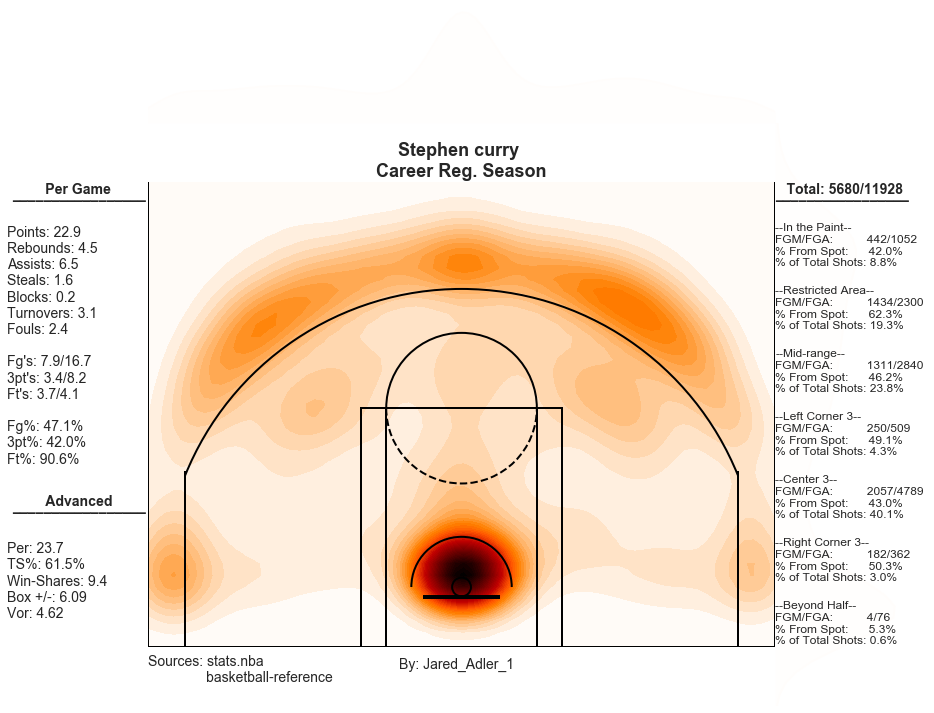

NameError: name 'career' is not defined

In [39]:
cmap=plt.cm.gist_heat_r

joint_shot_chart_kde = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y, stat_func=None,
                                 kind='kde', space=0, color=cmap(1), cmap=cmap,n_levels= 50)

joint_shot_chart_kde.ax_marg_x.set_axis_off()
joint_shot_chart_kde.ax_marg_y.set_axis_off()


joint_shot_chart_kde.fig.set_size_inches(12,11)


# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart_kde.ax_joint
draw_court(ax)


# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(-47.5,322.5)
ax.set_aspect('equal')

# Get rid of axis labels and tick marks
ax.set(xticks=[])
ax.set(yticks=[])
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')
ax.axis('off')


# # Optional: Add player picture
# img = OffsetImage(player_pic, zoom=0.5)

# img.set_offset((625,502))
# ax.add_artist(img)

# Add a title
ax.set_title(f'{player} \nCareer Reg. Season', 
             y=1.2, fontsize=18,fontweight = 'bold')

ax.text(-250,-75,f'''Sources: stats.nba
               basketball-reference''',
        fontsize=14)
ax.text(-50,-65,'By: Jared_Adler_1',
        fontsize=14)



# Career Averages Summary

ax.text(-350,314,'      Per Game   ',size = 14,fontweight='bold')
ax.text(-358,310,'_________________',size = 14,fontweight='bold')

ax.text(-362,73,career_averages,size = 14)

#Advance Stat Summary
ax.text(-350,65,'      Advanced   ',size = 14,fontweight='bold')
ax.text(-358,61,'_________________',size = 14,fontweight='bold')

ax.text(-362,-50,advanced_stats,size = 14)


#Career Shot Summary

plt.text(0,278,f'   Total: {t_shots} ',size = 14,fontweight='bold')
plt.text(0,275,'_________________',size = 14,fontweight='bold')

plt.text(0,232,paint_summary_plot,size = 12)
plt.text(0,192,ra_summary_plot,size = 12)
plt.text(0,152,mid_range_summary_plot,size = 12)
plt.text(0,112,l_corner_3_summary_plot,size = 12)
plt.text(0,72,center_3_summary_plot,size = 12)
plt.text(0,32,r_corner_3_summary_plot,size = 12)
plt.text(0,-8,backcourt_summary_plot,size = 12)


plt.show()


# Optional: Save image
player1 = "_".join(player.split())
player_career_kde = f'{player1}_{career}_kde.png'
joint_shot_chart_kde.savefig(player_career_kde)

In [ ]:
cmap=plt.cm.gist_heat_r

joint_shot_chart_hex = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y,
                                 kind='hex', space=0, color=cmap(1), cmap=cmap,gridsize=20)
joint_shot_chart_hex.ax_marg_x.set_axis_off()
joint_shot_chart_hex.ax_marg_y.set_axis_off()


joint_shot_chart_hex.fig.set_size_inches(12,11)

# A joint plot has 3 ax1es, the first one called ax1_joint 
# is the one we want to draw our court onto and adjust some other settings
ax1 = joint_shot_chart_hex.ax_joint
draw_court(ax1)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax1.set_xlim(250,-250)
ax1.set_ylim(-47.5,322.5)
ax1.set_aspect('equal')

# Get rid of axis labels and tick marks
ax1.set(xticks=[])
ax1.set(yticks=[])
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.tick_params(labelbottom='off', labelleft='off')
ax1.axis('off')

# # Optional: Add player picture
# img = OffsetImage(player_pic, zoom=0.5)

# img.set_offset((625,502))
# ax1.add_artist(img)

# Add a title
ax1.set_title(f'{player} \nCareer Reg. Season', 
             y=1.2, fontsize=18,fontweight = 'bold')

ax1.text(250,-75,f'''Sources: stats.nba
               basketball-reference''',
        fontsize=14)
ax1.text(50,-65,'By: Jared_Adler_1',
        fontsize=14)

#Career Averages Summary

ax1.text(350,314,'      Averages   ',size = 14,fontweight='bold')
ax1.text(358,310,'_________________',size = 14,fontweight='bold')

ax1.text(362,60,career_averages,size = 14)

#Advance Stat Summary
ax1.text(350,65,'      Advanced   ',size = 14,fontweight='bold')
ax1.text(358,61,'_________________',size = 14,fontweight='bold')

ax1.text(362,-50,advanced_stats,size = 14)


#Career Shot Summary

plt.text(0,278,f'   Total: {t_shots} ',size = 14,fontweight='bold')
plt.text(0,275,'________________',size = 14,fontweight='bold')

plt.text(0,232,paint_summary_plot,size = 12)
plt.text(0,192,ra_summary_plot,size = 12)
plt.text(0,152,mid_range_summary_plot,size = 12)
plt.text(0,112,l_corner_3_summary_plot,size = 12)
plt.text(0,72,center_3_summary_plot,size = 12)
plt.text(0,32,r_corner_3_summary_plot,size = 12)
plt.text(0,-8,backcourt_summary_plot,size = 12)


plt.show()


# Optional: Save image
player1 = "_".join(player.split())
player_career_hex= f'{player1}_{career}_hex.png'
joint_shot_chart_hex.savefig(player_career_hex)

In [ ]:
# Executive Summary

print(f'{player} shots during his career:')
print('_______________________________________')
print('\n')
print(paint_summary)
print('\n')
print(ra_summary)
print('\n')
print(mid_range_summary)
print('\n')
print(l_corner_3_summary)
print('\n')
print(center_3_summary)
print('\n')
print(r_corner_3_summary)
print('\n')
print(backcourt_summary)

In [ ]:
# d = client.regular_season_player_box_scores(
#   player_identifier="westbru01",
#   season_end_year=2019,)
# df = pd.DataFrame(d)